## Python数据结构dict相关方法性能测试
相关方法对应时间复杂度如下:

操作| 大O表示法
------------ | -------------
copy | O(n)
get item | O(1)
set item | O(1)
delete item | O(1)
contains(in) | O(1)
iteration | O(n)

字典与列表的不同之处在于你需要通过一个键(key)来访问元素,而列表是根据位置(index)

最常用的操作:
- 取值get
- 赋值set
- contains(in)

注意:list的contains操作是O(n)

### list和dict的in操作性能对比

生成包含连续值的list和包含key的dict,用随机数来检验操作符in的耗时

In [1]:
import timeit
import random

print('i               list(in)              dict(in)')
for i in range(10000, 1000001, 200000):
    t = timeit.Timer("random.randrange(%d) in x" %i, "from __main__ import random,x")
    x = list(range(i))
    lst_time = t.timeit(number=1000)
    
    x = {j:None for j in range(i)}
    dict_time = t.timeit(number=1000)
    print(f"{i}  {lst_time}  {dict_time}")

i               list(in)              dict(in)
10000  0.08395529999999995  0.0008760999999999353
210000  1.1638845000000002  0.0010618000000000016
410000  2.3917124  0.0013141000000000957
610000  3.4587202999999995  0.0018907999999999703
810000  4.4194259  0.0011860999999999677


 通过绘制图表来直观显示

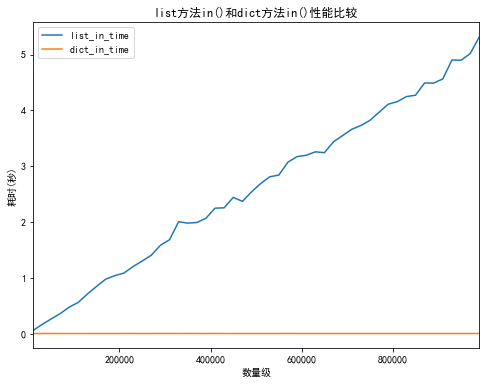

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

lst_in_time = []
dic_in_time = []

for i in range(10000, 1000001, 20000):
    t = timeit.Timer("random.randrange(%d) in x" %i, "from __main__ import random,x")
    x = list(range(i))
    lst_in_time.append(t.timeit(number=1000)) 
    
    x = {j:None for j in range(i)}
    dic_in_time.append(t.timeit(number=1000)) 

data = {
    'list_in_time':lst_in_time,
    'dict_in_time':dic_in_time
}

df = pd.DataFrame(data, index=range(10000, 1000001, 20000), columns=['list_in_time','dict_in_time'])


# 开始绘图
fig = df.plot(figsize=(8,6))  # # 创建图表对象
plt.title('list方法in()和dict方法in()性能比较')  # 图名
plt.xlabel('数量级')  # x轴标签
plt.ylabel('耗时(秒)') # y轴标签
plt.legend(loc = 'best')  

plt.show()